# UFO 1 data analysis part 1

Big Data házi feladat, UFO1 feladatkör EDA analízise, adatfelderítése.

A használathoz feltételezzük, hogy már létezik egy állomány, data.csv néven, ami tartalmazza a szükséges adatokat.

Ennek a notebooknak a célja, hogy a letöltött adatokkal megismerkedjünk, néhány megfigyelést állapítsunk meg róluk, esetlegesen a nem megfelelő adatokat kiemeljük, és töröljük a készletből.


## Adatok betöltése, átalakítása

Az egyszerű betöltés után néhány kisebb módosítást végeztünk az adatokon:
* Date / Time osztlop átnevezése Date-re, az kezelhetőbbség kedvéért
* Shape oszlop értékei nem voltak konzisztensen kis vagy nagybetűsek, ezért ezeket egységesen csupa lowercase-re konvertáltuk
* A dátumok feldolgozásához a Python saját parser-ét használtuk
    * Amit az nem volt képes feldolgozni, azt egy nem előforduló értékre állítottuk, amit majd később ki lehet szűrni / el lehet dobni
    * Mivel az eredeti adatok szintaxisa miatt jövőbeni adatokat talált a parser, ezért ezeket kézzel módosítottuk

In [1]:
%matplotlib inline
import pandas
import matplotlib
import time

In [2]:
start = time.time()

# Load data (labels are not included)
raw_data = pandas.read_csv("data.csv", sep=";", encoding="UTF8", header=None, skiprows=1)

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", \
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", \
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", \
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", \
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

data, wrong_data, skipped_lines = [], [], 0
for _, d in raw_data.iterrows():
    try:
        # Transform or validate data
        date = pandas.to_datetime(d[0])
        posted = pandas.to_datetime(d[6])
        
        row = (date, d[1], d[2], d[3], d[4], d[5], posted, d[7])
        
        # Do some checks...
        if date.date() > posted.date():
            wrong_data.append(row)
            continue
        
        if d[2] not in states:
            wrong_data.append(row)
            continue
        
        # Add data to cleaned array
        data.append(row)
    except Exception as e:
        skipped_lines += 1

names = ["Date", "City", "State", "Shape", "Duration", "Summary", "Posted", "Description"]
data = pandas.DataFrame.from_records(data, columns=names)
wrong_data = pandas.DataFrame.from_records(wrong_data, columns=names)

print('Loading data took ' + str(time.time() - start) + 's')
print('Raw data: ' + str(len(raw_data)) + ' lines')
print('Processed data: ' + str(len(data)) + ' lines')
print('Skipped because of parser exception: ' + str(skipped_lines) + ' lines')
print('Wrong data: ' + str(len(wrong_data)) + ' lines')

Loading data took 91.62343883514404s
Raw data: 113241 lines
Processed data: 98298 lines
Skipped because of parser exception: 118 lines
Wrong data: 14825 lines


## Adatok feltérképezése

### Használt oszlopok és az értékek típusai

In [3]:
wrong_data

,Date,City,State,Shape,Duration,Summary,Posted,Description
0,2017-10-29 20:00:00,UK/England,NaN,NaN,NaN,At approx. 8pm moon was behind clouds and a la...,2017-11-03,NaN
1,2017-10-27 10:00:00,North Gower (Canada),ON,NaN,3 seconds,Star moving in an unusual manner.,2017-11-03,NaN
2,2017-10-20 15:15:00,Scarborough (Canada),ON,NaN,3 minutes,A Very High Slow Shimmering Brilliant White Li...,2017-11-03,NaN
3,2017-08-18 10:06:00,Scarborough,ON,NaN,10-15 seconds,Stationary Vertical Bright White Rectangle Obj...,2017-09-05,NaN
4,2017-07-31 00:50:00,Oshawa (Canada),ON,NaN,30 seconds,"After two single white flashes, minutes later ...",2017-08-11,NaN
5,2017-07-05 23:00:00,Mission (Canada),BC,NaN,2 minutes,"Two small explosions in night sky, with what a...",2017-07-07,NaN
6,2017-06-26 22:00:00,Florida Coast (at sea),NaN,NaN,<1 second,"Bright green orb, surrounded by white light, f...",2017-07-07,NaN
7,2017-06-04 00:00:00,Unknown location (military video),NaN,NaN,NaN,They are not birds. ((anonymous report)),2017-06-09,NaN
8,2017-05-25 02:00:00,Gujranwala (Pakistan),NaN,NaN,1 hour,Small spots of lights very high in sky but to...,2017-06-02,NaN
9,2017-04-23 10:35:00,Oshawa (Canada),ON,NaN,4 minutes,"High, slow, flashing white light object.",2017-05-11,NaN


### Adatok vizualizációja az észlelés ideje alapján

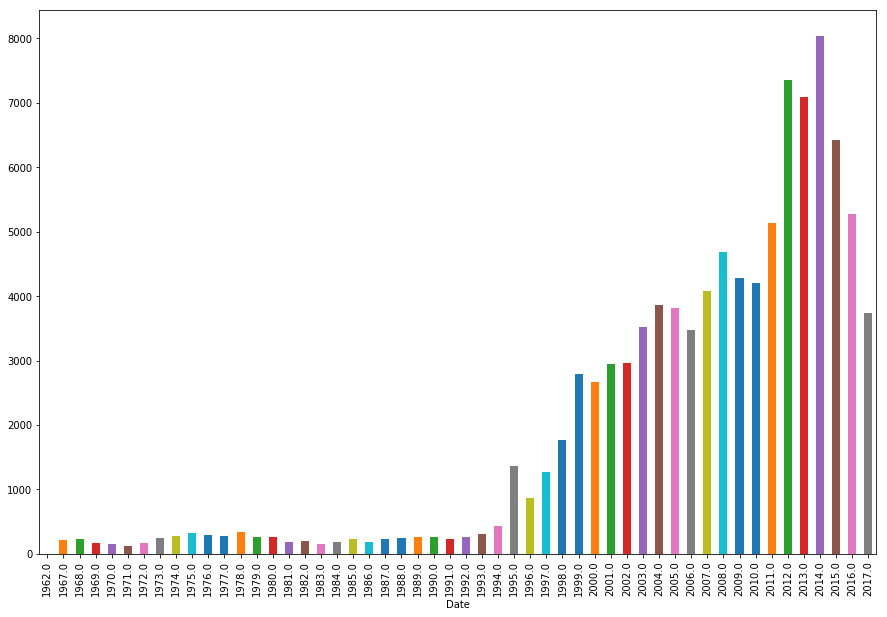

In [4]:
data.groupby(data["Date"].dt.year).count()["Date"].plot(figsize=(15,10),kind="bar")

### Adatok vizualizációja az észlelt ufók száma alapján, alak szerint csoportosítva

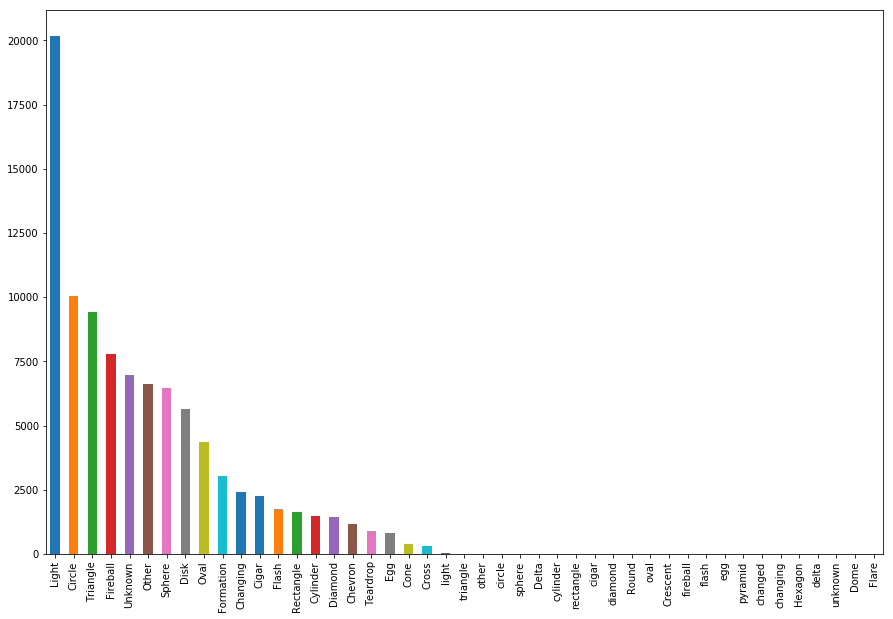

In [5]:
shape_counts = data["Shape"].value_counts()
shape_counts.plot(figsize=(15,10),kind="bar")